<AxesSubplot:>

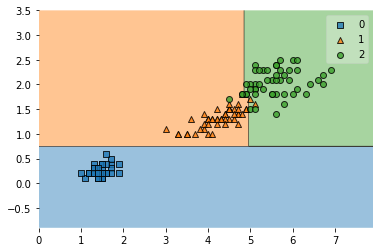

In [34]:
##iris dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

X=load_iris().data[:,[2,3]]
Y=load_iris().target
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X,Y,test_size=0.3, random_state=10)
model=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model.fit(Xtrain,Ytrain)
ypred=model.predict(Xtest)
#print(model.predict_proba(Xtest))
plot_decision_regions(X,Y,clf=model)

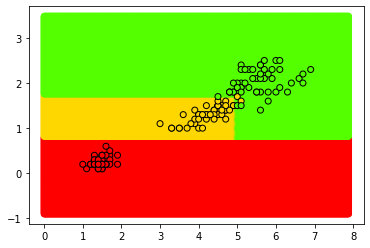

In [33]:
##iris dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

X=load_iris().data[:,[2,3]]
Y=load_iris().target
model=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model.fit(X,Y)

def plot(X,Y,model,h):
    x_1=np.arange(X[:,0].min()-1,X[:,0].max()+1,h)
    x_2=np.arange(X[:,1].min()-1,X[:,1].max()+1,h)
    xx_1,xx_2=np.meshgrid(x_1,x_2)
    xxtest=np.c_[xx_1.reshape(-1),xx_2.reshape(-1)]
    Z=model.predict(xxtest)
    Z=Z.reshape(xx_1.shape)
    plt.scatter(xx_1, xx_2,c=Z,cmap='prism')
    plt.scatter(X[:,0],X[:,1],c=Y, cmap='prism',edgecolors='k')
    
plot(X,Y,model,0.02)    

In [44]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

In [3]:
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

In [4]:
def error(p):
    return 1 - np.max([p, 1 - p])

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

## define models
LR  = LogisticRegression(solver='lbfgs' , random_state=0 , C=0.3, penalty='l2')
MLP = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5) , alpha=1e-5, random_state=1) 
SVM1 = SVC(kernel='linear', C=1) 
SVM2 = SVC(kernel = 'rbf',C=1, random_state = 0, gamma='scale')    
SVM3 = SVC(kernel='poly', degree=2, C=0.5, gamma='scale')   
DT  = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

##iris dataset
X=load_iris().data[:,[2,3]]
Y=load_iris().target
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X,Y,test_size=0.3, random_state=10)

In [90]:
models=[LR,MLP, SVM1,SVM2,SVM3,DT]
for i in models:
    model=i
    model.fit(X,Y)
    model_score=model.score(Xtest,Ytest)
    model_cv_score=np.mean(cross_val_score(model,X,Y,cv=10))
    print(i,model_score,model_cv_score)

LogisticRegression(C=0.3, random_state=0) 1.0 0.9666666666666666
MLPClassifier(alpha=1e-05, hidden_layer_sizes=5, random_state=1, solver='lbfgs') 1.0 0.9333333333333332
SVC(C=1, kernel='linear') 1.0 0.96
SVC(C=1, random_state=0) 0.9777777777777777 0.96
SVC(C=0.5, degree=2, kernel='poly') 1.0 0.9666666666666666
DecisionTreeClassifier(max_depth=3, random_state=0) 1.0 0.96


/home/masa1771/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [109]:
models=[LR,MLP, SVM1,SVM2,SVM3,DT]
for i in models:
    model=i
    model.fit(X,Y)
    ypred=model.predict(X)
   # print(i,classification_report(Y,ypred))
    print(confusion_matrix(Y,ypred))   

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
[[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
